In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('database.csv')

# Step 1: Data Cleaning
# Check for missing values in Latitude and Longitude
print("Missing values before cleaning:")
print(df[['Latitude', 'Longitude']].isna().sum())

# Drop rows with missing Latitude or Longitude
df = df.dropna(subset=['Latitude', 'Longitude'])

# Verify missing values are handled
print("Missing values after cleaning:")
print(df[['Latitude', 'Longitude']].isna().sum())



Missing values before cleaning:
Latitude     66
Longitude    66
dtype: int64
Missing values after cleaning:
Latitude     0
Longitude    0
dtype: int64


In [2]:
# Step 2: Basic Analysis
# Total deposits in 2016
total_deposits_2016 = df['2016 Deposits'].sum()
print(f"Total Deposits in 2016: ${total_deposits_2016:,.2f}")

# Branch with the highest deposits in 2016
highest_deposit_branch = df.loc[df['2016 Deposits'].idxmax()]
print("Branch with highest deposits in 2016:")
print(highest_deposit_branch[['Branch Name', 'City', 'State', '2016 Deposits']])

# Branch with the lowest deposits in 2016
lowest_deposit_branch = df.loc[df['2016 Deposits'].idxmin()]
print("Branch with lowest deposits in 2016:")
print(lowest_deposit_branch[['Branch Name', 'City', 'State', '2016 Deposits']])



Total Deposits in 2016: $2,305,716,252.00
Branch with highest deposits in 2016:
Branch Name      JPMorgan Chase Bank Main Office
City                                    Columbus
State                                         OH
2016 Deposits                         1155185000
Name: 0, dtype: object
Branch with lowest deposits in 2016:
Branch Name      Jew. Home & Hosp. Mobile Tel. Branch
City                                    New York City
State                                              NY
2016 Deposits                                       0
Name: 270, dtype: object


In [3]:
# Step 3: Trend Analysis
# Calculate deposit growth rates (2010-2016)
columns = ['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits', '2015 Deposits', '2016 Deposits']
df['Deposit Growth Rate'] = (df['2016 Deposits'] - df['2010 Deposits']) / df['2010 Deposits'] * 100

# Branch with the highest growth rate
highest_growth_branch = df.loc[df['Deposit Growth Rate'].idxmax()]
print("Branch with highest deposit growth rate:")
print(highest_growth_branch[['Branch Name', 'City', 'State', 'Deposit Growth Rate']])



Branch with highest deposit growth rate:
Branch Name            Fifth Avenue & 44th Street Banking Center Branch
City                                                      New York City
State                                                                NY
Deposit Growth Rate                                                 inf
Name: 4639, dtype: object


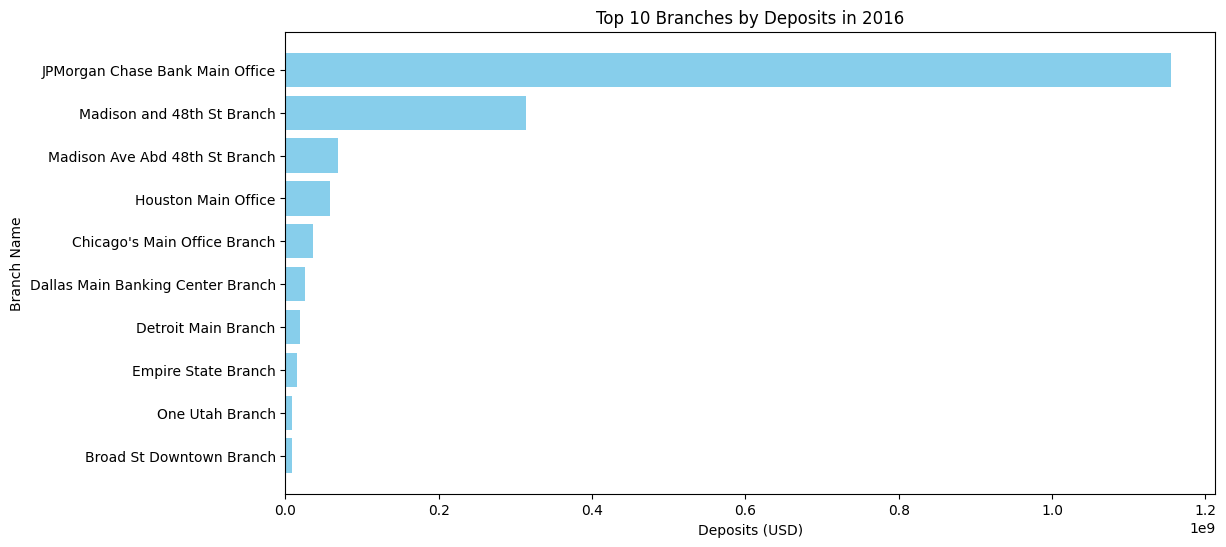

In [4]:
# Step 4: Visualization
# Bar chart of top 10 branches by 2016 deposits
top_10_branches = df.nlargest(10, '2016 Deposits')
plt.figure(figsize=(12, 6))
plt.barh(top_10_branches['Branch Name'], top_10_branches['2016 Deposits'], color='skyblue')
plt.xlabel('Deposits (USD)')
plt.ylabel('Branch Name')
plt.title('Top 10 Branches by Deposits in 2016')
plt.gca().invert_yaxis()
plt.show()



In [6]:
# Step 5: Geospatial Analysis
# Create a map of branch locations
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Branch: {row['Branch Name']}\nDeposits: ${row['2016 Deposits']:,.2f}",
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save map to an HTML file
m.save("chase_branch_map.html")
print("Map saved as 'chase_branch_map.html'")


Map saved as 'chase_branch_map.html'


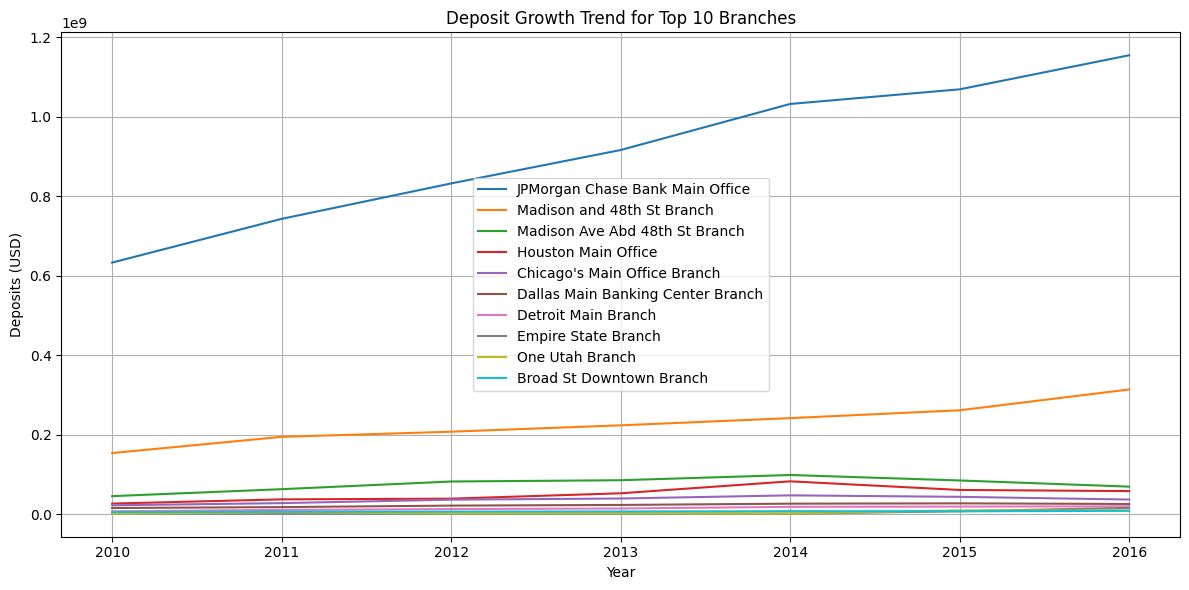

In [7]:


# Additional Analysis
# Line chart: Deposit growth trend for top 10 branches
top_10_branches = df.nlargest(10, '2016 Deposits')
plt.figure(figsize=(12, 6))
for _, branch in top_10_branches.iterrows():
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
    deposits = branch[['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits',
                       '2014 Deposits', '2015 Deposits', '2016 Deposits']]
    plt.plot(years, deposits, label=branch['Branch Name'])

plt.title("Deposit Growth Trend for Top 10 Branches")
plt.xlabel("Year")
plt.ylabel("Deposits (USD)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
